<a href="https://colab.research.google.com/github/RainXie23/MANE4961---Machine-Learning-for-Engineering-Fall-2025-/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) You are provided with a dataset of different aircraft that includes three columns:
Aircraft (string; not used in clustering), Speed_kmh (cruise speed in km/h), and FuelFlow_kgph (cruise fuel flow in kg/hour for the whole aircraft). Using only the numeric features Speed_kmh and FuelFlow_kgph, apply k-means clustering to group the aircraft
into meaningful performance categories. Be sure to standardize the features (for example, with StandardScaler) before clustering. For values of k from 2 to 6, compute the silhouette score and plot the score as a function of k. Based on your plot, select a reasonable valueof k, fit k-means, and create a scatter plot of cruise speed versus fuel flow where pointsare colored according to their assigned cluster. Finally, briefly interpret each clusterin engineering terms,for example, “fast and high fuel flow corresponds to jets,” while
“slower and very low fuel flow corresponds to general aviation aircraft.” As an optionalstep, you may label a few representative aircraft on your plot to make the clusters more interpretable.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<function matplotlib.pyplot.show(close=None, block=None)>

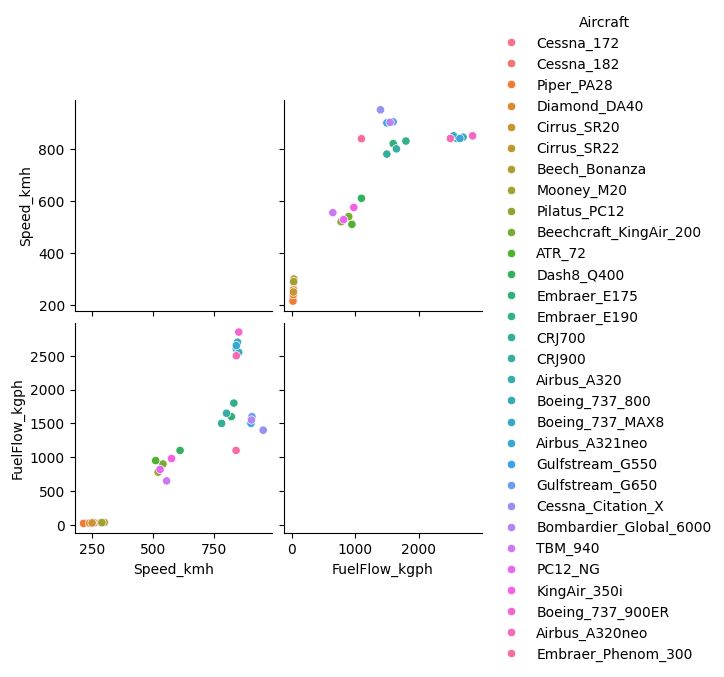

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from google.colab import drive

drive.mount('/content/drive')
file_path = "/content/drive/My Drive/Colab Notebooks/aircraft_performance.csv"
df = pd.read_csv(file_path)

sns.pairplot(df, hue='Aircraft')
plt.show

In [ ]:
X = df.drop(columns=['Aircraft'])
scaler = StandardScaler()
X = scaler.fit_transform(X)

Text(0, 0.5, 'silhouette scores')

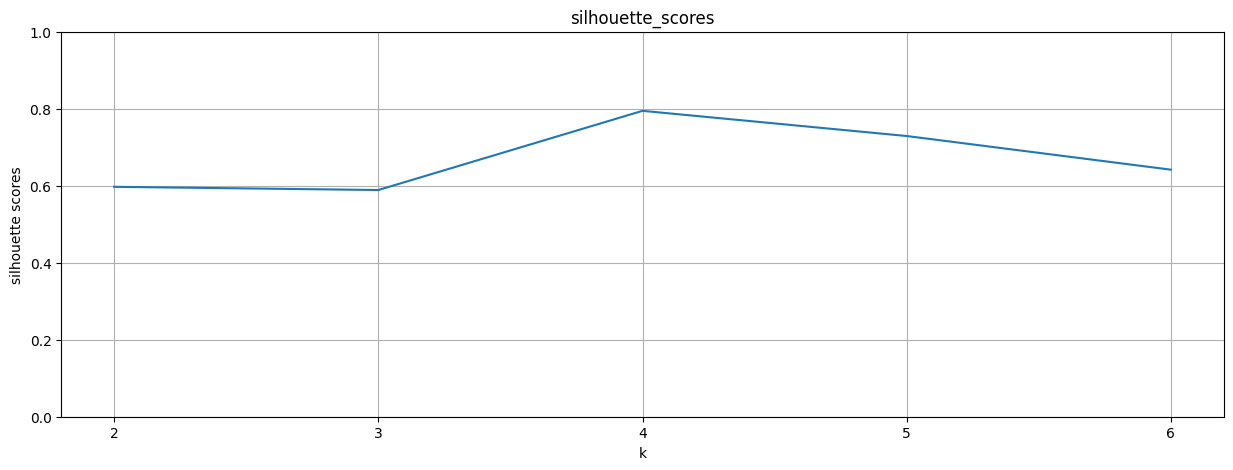

In [ ]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k,init='k-means++',
    n_init='auto',)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 7), silhouette_scores)
plt.grid(True)
plt.xticks(ticks = range(2, 7))
plt.ylim(0,1)
plt.title('silhouette_scores')
plt.xlabel('k')
plt.ylabel('silhouette scores')

Choose n = 4 because it has the highest silhouette score

In [ ]:
from sklearn.cluster import KMeans
skmodel = KMeans(n_clusters=4,
init = 'k-means++',
max_iter = 300,
tol = 0.0001,
verbose = 0,
random_state=None,
copy_x=True,
algorithm='lloyd')

df['Cluster'] = skmodel.fit_predict(X)

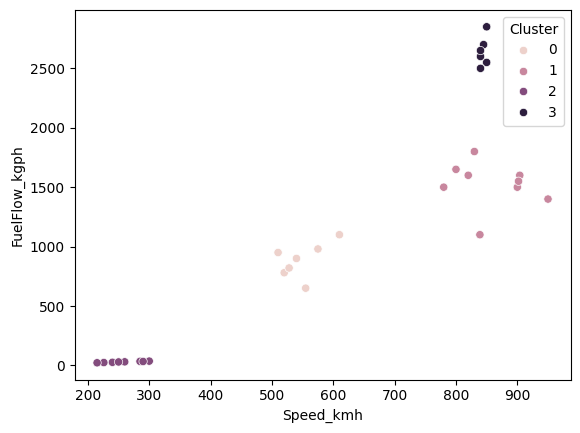

In [ ]:
sns.scatterplot(x='Speed_kmh', y='FuelFlow_kgph', hue='Cluster', data=df)
plt.show()

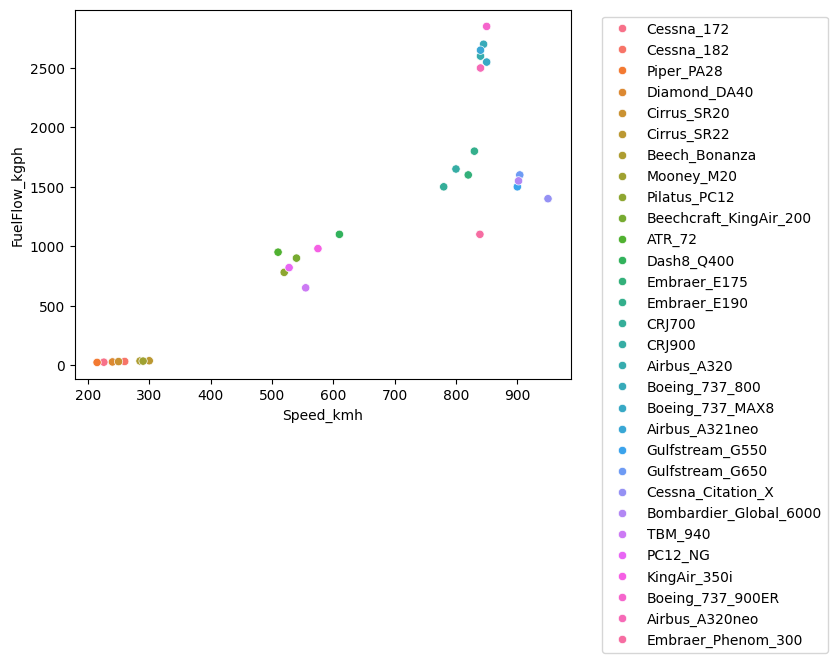

In [ ]:
sns.scatterplot(x='Speed_kmh', y='FuelFlow_kgph', hue='Aircraft', data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Based on the scatterplot of the clustered data, cluster 2 (bottom left) slow speed and low fuelflow seems to be related to their single engine design and small chassis; cluster 0 (middle down) middle speed but low fuelflow seems to be related to short distance jets for regional or business use; cluster 1 (right middle) seems to be related to even better business jets (or higher performance?); cluster 3 seems to be related to commercial planes and well known planes like Boeing 737.

2) Implement your own linear machine learning model optimized with minibatch gradient descent method to predict the price of a house in a city with population
of 160, 000. Train the model to fit the housing prices dataset found on LMS. Vary the
batch size from 1,5,10, and 20. Plot the objective function, J for each batch size. You do
not need to split the data into train and test set for this problem. What happens when
you use batch size equal to one?

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks


Text(0, 0.5, 'Price in $10,000s')

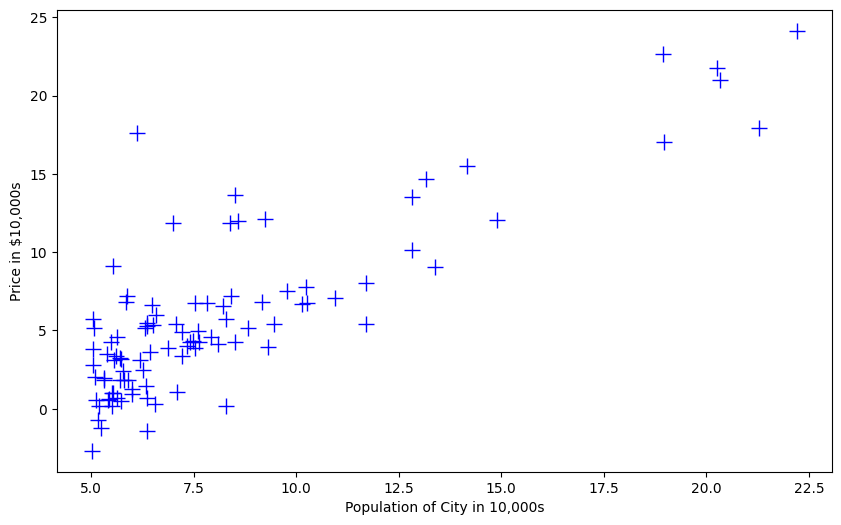

In [1]:
from google.colab import drive
from google.colab import files

# Mount Google Drive
drive.mount('/content/drive')
# Go to the current folder
%cd /content/drive/MyDrive/Colab\ Notebooks/


%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

datafile = 'housing_prices.txt'
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1),unpack=True)
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size
X = np.insert(X,0,1,axis=1)

plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],'b+',markersize=12)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Price in $10,000s')

In [30]:
def h(w, X):
  return np.dot(X, w)

def mse(w, X, y):
  # Use the size of the current batch (len(y)) instead of the global m
  batch_size = len(y)
  # Correctly calculate the difference between prediction and actual values
  error = h(w, X) - y.reshape(-1)
  # Calculate the mean squared error
  return float(1/(2*batch_size) * np.dot(error.T, error))

In [31]:
def minibatchGD(X, y, w_start=np.zeros(2), alpha=0.01, batch_size=20):
    w = w_start.copy()  # avoid mutating the original
    m = len(y)

    nums = np.random.choice(range(m), size=batch_size, replace=False)
    X_batch = X[nums]
    y_batch = y[nums]

    prediction = h(w, X_batch)
    loss = prediction - y_batch.reshape(-1) # Reshape y_batch to match prediction

    grad = (1/batch_size) * np.dot(X_batch.T, loss)

    w = w - alpha * grad
    cost = mse(w, X_batch, y_batch)

    return w, cost

In [35]:
def run_minibatchGD(X, y, w_start=np.zeros(2), alpha=0.01, batch_size=20, epochs=100):
    w = w_start.copy()
    costs = []
    for epoch in range(epochs):
        # In a full implementation, you would iterate through all minibatches
        # Here, we'll just pick a random batch in each epoch for simplicity as requested
        w, cost = minibatchGD(X, y, w, alpha, batch_size)
        costs.append(cost)
    return w, costs

In [36]:
wnew, cost = run_minibatchGD(X, y, alpha=0.01, batch_size=1)
print(wnew)
print(cost)

[-0.52385831  0.77711003]
[0.03631285069407618, 2.2871886248994704, 0.030621997855698347, 0.27981269659110813, 0.39840263219336736, 3.029727808841815, 0.001465174145944686, 359.10370739107253, 24.33070350814633, 6.736719613998545, 4.075809242080027, 7.686598836717751, 0.5582326300129714, 4.593006262147074, 1.1972289298224514, 1.2301044900457372, 0.9054630651112232, 0.46790711494579623, 1.1312838017655564, 0.00042357569216601736, 0.028546716317724614, 0.16731947008478965, 0.061381154837006006, 1.202495231142729, 673.2021763941592, 19.83573435317134, 14.15432058427518, 6.096322660420627, 3.4488464818181535, 0.5022473089386814, 0.3163040136762772, 0.0017822428542257206, 7.908339870029634, 0.9370618890063386, 2.8107327050622337, 1.6606424608563937, 0.3320404787100201, 0.20033138686839147, 0.4113665662148147, 5.224635910842737, 3.7002937679841192, 0.04234890254457606, 1.4402357903563596, 0.8064087442053443, 1.793990083720718, 48.31136907789661, 40.13300682448748, 0.1878488082806175, 0.00367

3) Use the Scikit-learn breast cancer Wisconsin dataset and a logistic regression
model to classify breast cancers. You must recursively eliminate features to find the best
two features to perform the classification. Evaluate the model using various classification
metrics and report your findings. Use a 70%-30% split.

Best 2 features: ['worst radius', 'worst concave points']
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        63
           1       0.95      0.97      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



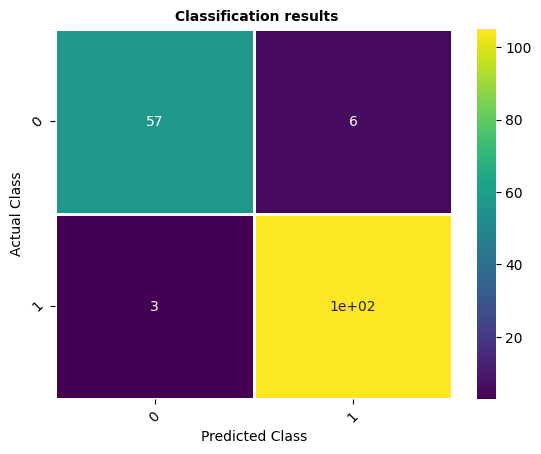

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report


data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lr = LogisticRegression(solver='lbfgs', max_iter=1000)
selector = RFE(lr, n_features_to_select=2)
selector.fit(X_train, y_train)

selected_features = X.columns[selector.support_]
print("Best 2 features:", selected_features.tolist())
preds = selector.predict(X_test)

cm = confusion_matrix(y_test, preds)
ax = sns.heatmap(cm,linewidths=2, annot=True, cmap='viridis', cbar=True);

plt.xlabel('Predicted Class');
plt.ylabel('Actual Class');
plt.xticks(rotation=45);
plt.yticks(rotation=45);
plt.title(' Classification results', fontsize='medium', fontweight='bold');
print(classification_report(y_test, preds))

4)  Construct a neural network with a single hidden layer containing two neurons
using Tensorflow. Use ReLU as activation function. Optimize the network with stochastic
gradient descent method. Choose mean squared error to calculate the loss. Fit the housing
prices dataset found on LMS using the network. Use the trained neural network model
to predict the price of a house in a city with population of 165, 000. Calculate a useful
regression metric. Plot the training and validation losses. Use a 70%-30% split for the
training and validation dataset. The architecture of the neural network and the optimizer
are fixed for this problem. Therefore, you need to choose a suitable learning rate and
number of epochs to minimize the loss. Explain the trends you found in the plots for
training and validation losses.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test loss: 27.592817306518555
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Predicted price for a city with population of 165,000: 58800.55859375
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Mean Absolute Error on the test set: 40440.62301462809


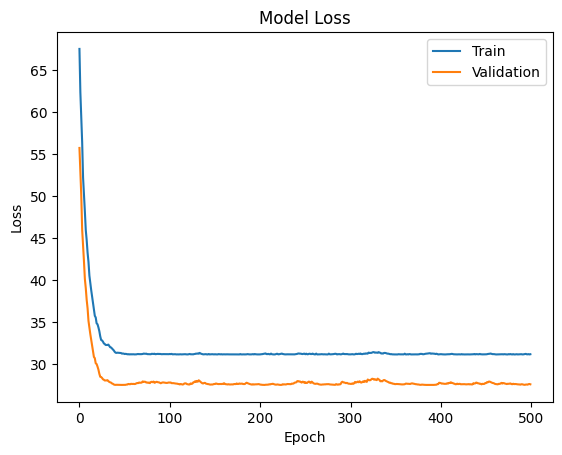

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt


datafile = 'housing_prices.txt'
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1),unpack=True)
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size
X = np.insert(X,0,1,axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = Sequential()
model.add(Dense(2, activation='relu', input_shape=[2])) # Input layer with 2 features (including intercept)
model.add(Dense(1)) # Output layer

opt = optimizers.SGD(learning_rate=0.01) # Using SGD optimizer as requested
mse = tf.keras.losses.MeanSquaredError() # Using Mean Squared Error loss

model.compile(loss=mse, optimizer=opt)

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=500, verbose=0) # Increased epochs for better training

loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss: {loss}")

# Predict the price for a city with a population of 165,000
# The input needs to include the intercept term (1)
population_165k = np.array([[1, 16.5]])
predicted_price = model.predict(population_165k)
print(f"Predicted price for a city with population of 165,000: {predicted_price[0][0]*10000}")

# Calculate Mean Absolute Error
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error on the test set: {mae*10000}")


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()